# The Sparks Foundation : Data Science and Business Analytics Internship

# Author : Priyanka Shaw

# Task#3 : Perform "Exploratory Data Analysis" on dataset 'SampleSuperstore'

### In this task we will try to find out the weak areas of the business where we can work to make more profit.

# Steps to be followed:
--Importing the Libraries

--Reading the dataset

--Data Prepocessing

--EDA 

--Data Visualization

# Step(1) : Importing the required libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Step(2) : Reading the dataset

In [23]:
dataset = pd.read_csv('SampleSuperstore.csv')
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Step(3) : Data Preprocessing

In [24]:
dataset.shape

(9994, 13)

In [25]:
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [26]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [28]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [29]:
#checking for the duplicate value in the dataset
dataset.duplicated().sum()

17

In [30]:
#dropping the duplicates
dataset.drop_duplicates()
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [31]:
#removing the unnecessary column such as postal code
dataset= dataset.drop(['Postal Code'],axis = 1)
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Exploratory Data Analysis

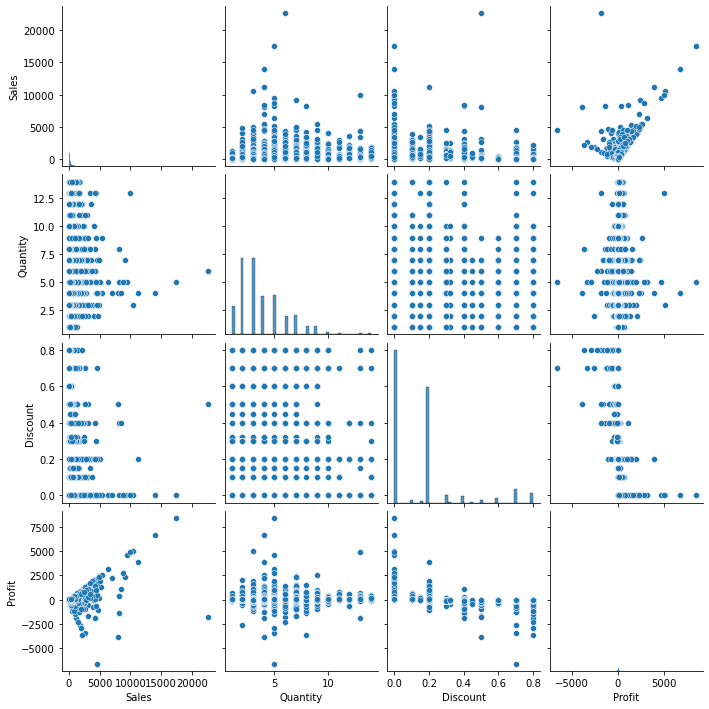

In [32]:
#visualizing the dataset as a whole using the pair plot
import seaborn as sns
sns.pairplot(dataset)

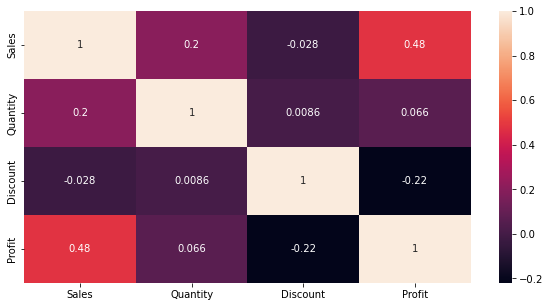

In [33]:
#finding the pairwise correlations between the columns and visualizing using the heatmaps
dataset.corr()
plt.figure(figsize = (10,5))
sns.heatmap(dataset.corr() , annot = True)
plt.show()

## Visualising the categories

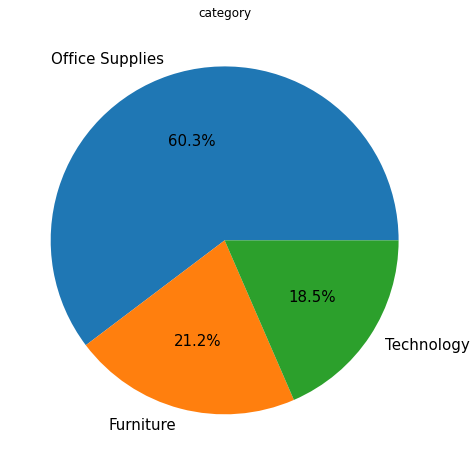

In [42]:
plt.figure(figsize = (18,8))
textprops = {"fontsize" : 15}
plt.title('category')
plt.pie(dataset['Category'].value_counts() , labels = dataset['Category'].value_counts().index, autopct='%1.1f%%' ,textprops= textprops)
plt.show()

C:\Users\PRIYANKA SHAW\AppData\Local\Temp\ipykernel_8524\177461785.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar()


<Figure size 720x1152 with 0 Axes>

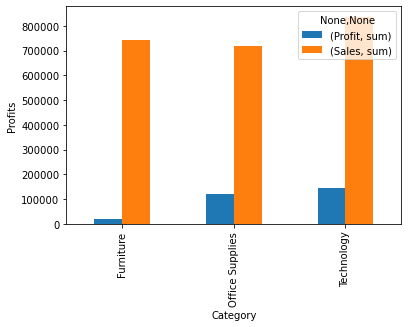

In [43]:
#using the bar graph, we wil get to know the profit geneated by selling the different products of the retail shop
plt.figure(figsize = (10,16))
dataset.groupby('Category')['Profit', 'Sales'].agg(['sum']).plot.bar()
plt.ylabel("Profits")
plt.show()

#### Another way of representing the above bar graph diagram

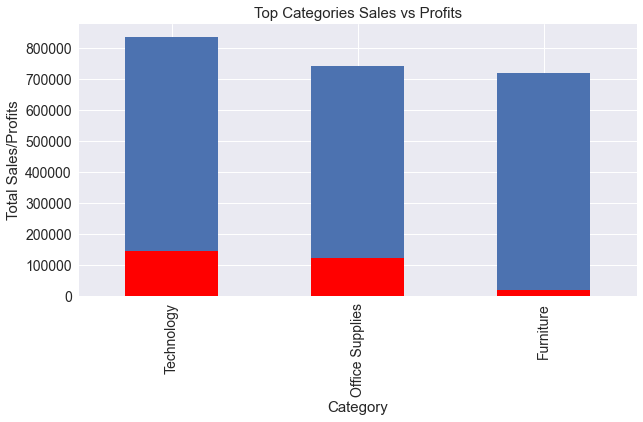

In [52]:
#computing the top categories in terms of sales from 1st 100 observations 
top_category_s = dataset.groupby("Category").Sales.sum().nlargest(n=100)

#computing the top categories in terms of profits from 1st 100 observations 
top_category_p = dataset.groupby("Category").Profit.sum().nlargest(n=100)

#visulizing by potting
plt.style.use("seaborn")
top_category_s.plot(kind = "bar", figsize = (10,5) , fontsize = 14)
top_category_p.plot(kind = "bar", figsize = (10,5) , fontsize = 14, color = "red")
plt.xlabel("Category" , fontsize = 15)
plt.ylabel("Total Sales/Profits", fontsize = 15)
plt.title("Top Categories Sales vs Profits", fontsize = 15)
plt.show()


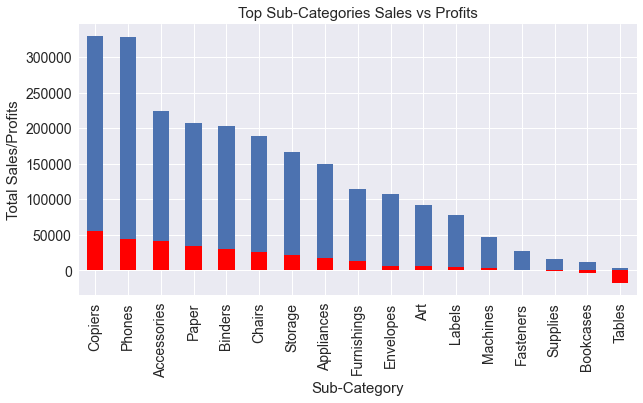

In [55]:
#computing the top sub-categories in terms of sales from 1st 100 observations 
top_subcategory_s = dataset.groupby("Sub-Category").Sales.sum().nlargest(n=100)

#computing the top sub-categories in terms of profits from 1st 100 observations 
top_subcategory_p = dataset.groupby("Sub-Category").Profit.sum().nlargest(n=100)

#visulizing by potting
plt.style.use("seaborn")
top_subcategory_s.plot(kind = "bar", figsize = (10,5) , fontsize = 14)
top_subcategory_p.plot(kind = "bar", figsize = (10,5) , fontsize = 14, color = "red")
plt.xlabel("Sub-Category" , fontsize = 15)
plt.ylabel("Total Sales/Profits", fontsize = 15)
plt.title("Top Sub-Categories Sales vs Profits", fontsize = 15)
plt.show()

<AxesSubplot:ylabel='Sub-Category'>

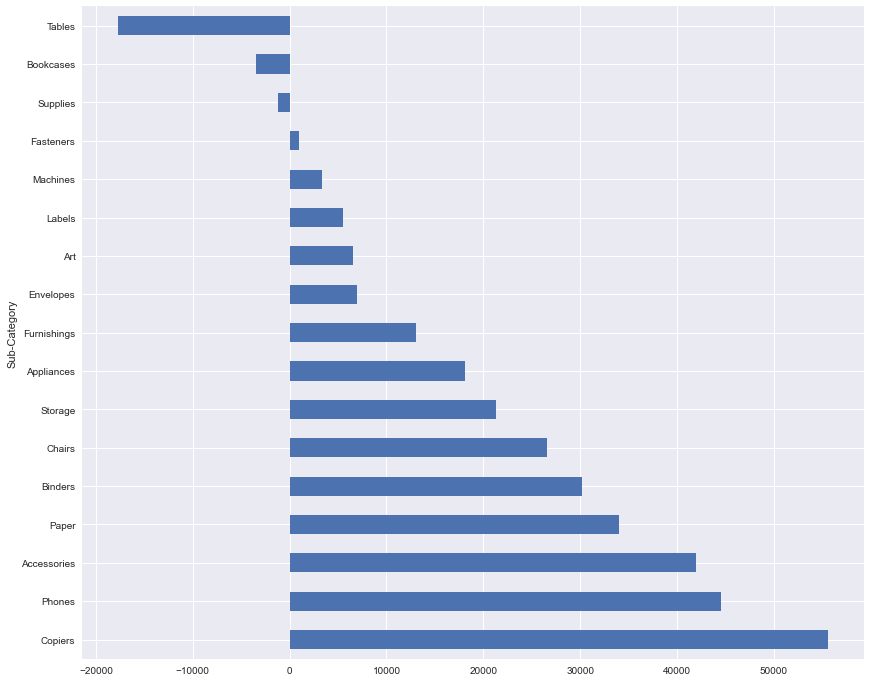

In [56]:
# A more detailed view

plt.figure(figsize = (14, 12))
statewise= dataset.groupby(["Sub-Category"])["Profit"].sum().nlargest(50)
statewise.plot.barh()

## Visualising the discount

F:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

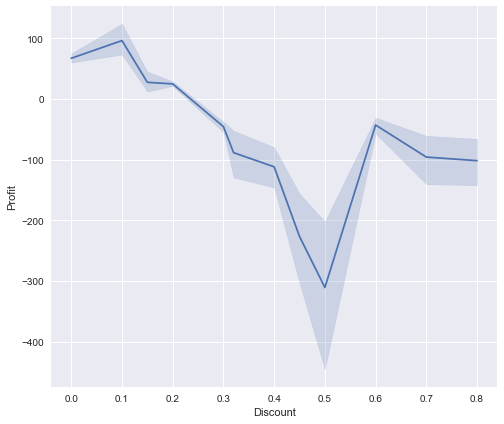

In [57]:
plt.figure(figsize = (8,7))
sns.lineplot(dataset["Discount"] , dataset["Profit"] , data= dataset)

## Visualising the Sales vs Profits in different states

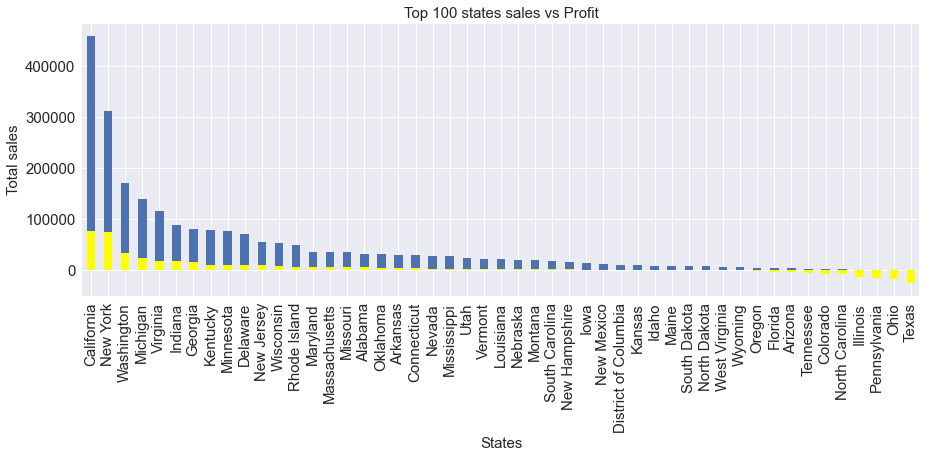

In [64]:
# Computing the top states in terms of sales from first 10 observations
top_states_s = dataset.groupby("State").Sales.sum().nlargest(n = 100)

# Computing the top states in terms of profits from first 10 observations
top_states_p = dataset.groupby("State").Profit.sum().nlargest(n = 100)

plt.style.use("seaborn")
top_states_s.plot(kind= "bar" , figsize = (15,5) , fontsize = 15)
top_states_p.plot(kind= "bar" , figsize = (15,5) , fontsize = 15 , color = "yellow")
plt.xlabel('States', fontsize = 15)
plt.ylabel('Total sales', fontsize = 15)
plt.title("Top 100 states sales vs Profit" , fontsize = 15)
plt.show()


## Checking the interdependency  of Sales , Profits and Discounts

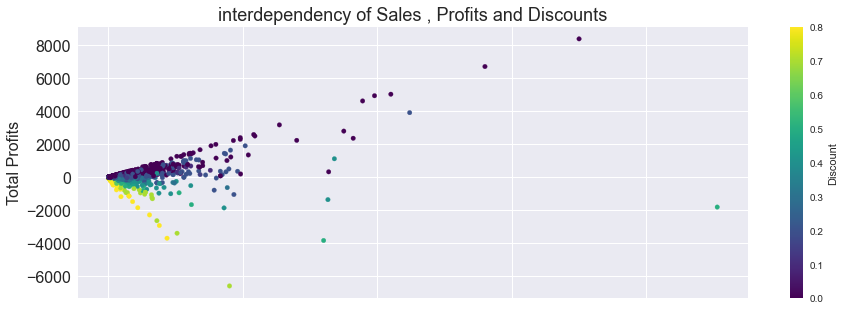

In [67]:
plt .style.use('seaborn')
dataset.plot(kind = 'scatter', figsize= (15,5), x = "Sales", y= "Profit", c= 'Discount', s=20 , fontsize= 16, colormap= 'viridis')
plt.ylabel("Total Profits", fontsize = 16)
plt.title("interdependency of Sales , Profits and Discounts", fontsize = 18)

plt.show()

### The graph clearly shows that if we give more discount on our products , sales increases but profit decreases.

# Conclusion:

## The weak areas where one can work to make more profit are:
**1) We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.**

**2) Considering the sub-categories sales of tables should be minimized**

**3) Increase sales more in the eastas profit is more**

**4) We should concentrate on the states like 'New York' and ' Calefornia' to make more profit.**

# THANK YOU!!!!